In [1]:
pip install pymysql

In [2]:
import pymysql

In [3]:
import pandas as pd

In [4]:
#Database connection details
db_config = {
    "host":"localhost", 
    "user":"root", 
    "password":"pragya", 
    "database":"sales" }

In [5]:
# SQL Queries
queries = {
    "question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail" :
        """SELECT
            DATE_FORMAT(order_date, '%m') AS Month_ID,
            DATE_FORMAT(order_date, '%M') AS Month,
            DATE_FORMAT(order_date, '%Y') AS Year,
            SUM(after_discount) AS total_transaction
        FROM order_detail
        WHERE YEAR(order_date) = 2021 
          AND is_valid = 1
        GROUP BY Month_ID, Month, Year
        ORDER BY total_transaction DESC;
    """,
    "question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail" :
    """
        SELECT
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            skudet.category,
            SUM(ordet.after_discount) AS total_transaction
        FROM
            order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE
            ordet.is_valid = 1 
            AND DATE_FORMAT(ordet.order_date, '%Y') = '2022'
        GROUP BY
            DATE_FORMAT(ordet.order_date, '%Y'),
            skudet.category
        ORDER BY
            total_transaction DESC;
    """,
    "question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail":
    """
        WITH final_table AS (
            SELECT
                skudet.category,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
            FROM order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE ordet.is_valid = 1
            GROUP BY skudet.category
        )
        SELECT *, (transaction_2022 - transaction_2021) AS delta,
        CASE WHEN transaction_2022 > transaction_2021 THEN 'INCREASE' ELSE 'DECREASE' END AS remark
        FROM final_table;
    """,
    "question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail" :
    """
        SELECT
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            COUNT(DISTINCT ordet.id) AS freq
        FROM
            order_detail AS ordet
        JOIN
            payment_detail AS paydet ON ordet.payment_id = paydet.id
        WHERE
            ordet.is_valid = 1 
            AND YEAR(ordet.order_date) = 2022
        GROUP BY
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y')
        ORDER BY
            freq DESC
        LIMIT 5;
    """,
    "question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data." :
    """
        WITH final_table AS (
            SELECT
                CASE
                    WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                    WHEN LOWER(skudet.sku_name) LIKE '%apple%' 
                         OR LOWER(skudet.sku_name) LIKE '%iphone%' 
                         OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                    WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                    WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                    WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
                END AS product_brand,
                SUM(ordet.after_discount) AS total_transaction
            FROM
                order_detail AS ordet
            JOIN
                sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE
                ordet.is_valid = 1
            GROUP BY
                product_brand
        )
        SELECT *
        FROM final_table
        WHERE product_brand IS NOT NULL
        ORDER BY total_transaction DESC;
    """
}

In [6]:
from IPython.display import display

In [7]:
# Connect to the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1031430746.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1031430746.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,year,category,total_transaction
0,2022,Mobiles & Tablets,2.738477e+09
1,2022,Entertainment,1.083417e+09
2,2022,Appliances,9.287520e+08
3,2022,Computing,6.372246e+08
4,2022,Men Fashion,3.999979e+08
5,2022,Women Fashion,2.707084e+08
6,2022,Home & Living,2.359769e+08
7,2022,Health & Sports,1.560251e+08
8,2022,Beauty & Grooming,1.367953e+08
9,2022,Superstore,9.792980e+07


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1031430746.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)



--- question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


,category,transaction_2021,transaction_2022,delta,remark
0,Kids & Baby,7.120865e+07,7.715455e+07,5.945907e+06,INCREASE
1,Men Fashion,1.736243e+08,3.999979e+08,2.263736e+08,INCREASE
2,Computing,5.186366e+08,6.372246e+08,1.185880e+08,INCREASE
3,School & Education,3.416521e+07,5.191514e+07,1.774992e+07,INCREASE
4,Women Fashion,2.521379e+08,2.707084e+08,1.857051e+07,INCREASE
5,Superstore,8.584568e+07,9.792980e+07,1.208412e+07,INCREASE
6,Appliances,6.556505e+08,9.287520e+08,2.731014e+08,INCREASE
7,Entertainment,4.571424e+08,1.083417e+09,6.262750e+08,INCREASE
8,Mobiles & Tablets,1.111820e+09,2.738477e+09,1.626657e+09,INCREASE
9,Health & Sports,9.950524e+07,1.560251e+08,5.651990e+07,INCREASE



--- question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1031430746.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



--- question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data. ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1031430746.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,1.734407e+09
1,Apple,1.334566e+09
2,Huawei,1.894808e+08
3,Sony,1.871755e+08
4,Lenovo,1.871394e+08


Database connection closed.


In [8]:
import os

In [9]:
#Database connection details
db_config = {
    "host":"localhost", 
    "user":"root",
    "password":"pragya",
    "database":"sales" }

In [10]:
#Folder path to save CSV files
output_folder = r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset"
os.makedirs(output_folder, exist_ok = True) 

In [11]:
# List of tables to export
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]  

In [12]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: order_detail


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table order_detail exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\customer_detail.csv.
Database connection closed.


In [13]:
df_od = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\order_detail.csv")
df_sd = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sku_detail.csv")
df_pd = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\payment_detail.csv")
df_cd = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\customer_detail.csv")

In [14]:
print("Columns in df_od:", df_od.columns)
print("Columns in df_sd:", df_sd.columns)

Columns in df_od: Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')
Columns in df_sd: Index(['id', 'sku_name', 'base_price', 'cogs', 'category'], dtype='object')


In [15]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [16]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how = 'left', on = 'sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how = 'left', on = 'customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how = 'left', on = 'payment_id')
                  )

In [17]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155628 entries, 0 to 155627
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               155628 non-null  object 
 1   customer_id      155628 non-null  object 
 2   order_date       155628 non-null  object 
 3   sku_id           155628 non-null  object 
 4   price            155628 non-null  int64  
 5   qty_ordered      155628 non-null  int64  
 6   before_discount  155628 non-null  float64
 7   discount_amount  155628 non-null  float64
 8   after_discount   155628 non-null  float64
 9   is_gross         155628 non-null  int64  
 10  is_valid         155628 non-null  int64  
 11  is_net           155628 non-null  int64  
 12  payment_id       155628 non-null  int64  
 13  sku_name         155628 non-null  object 
 14  base_price       155628 non-null  float64
 15  cogs             155628 non-null  float64
 16  category         155628 non-null  obje

In [18]:
print(df_pd.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [19]:
print(df_od.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [20]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     48 non-null     object 
 1   payment_method   48 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 5.8+ KB


In [21]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155628 entries, 0 to 155627
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               155628 non-null  object        
 1   customer_id      155628 non-null  object        
 2   order_date       155628 non-null  datetime64[ns]
 3   sku_id           155628 non-null  object        
 4   price            155628 non-null  int64         
 5   qty_ordered      155628 non-null  int64         
 6   before_discount  155628 non-null  float64       
 7   discount_amount  155628 non-null  float64       
 8   after_discount   155628 non-null  float64       
 9   is_gross         155628 non-null  int64         
 10  is_valid         155628 non-null  int64         
 11  is_net           155628 non-null  int64         
 12  payment_id       155628 non-null  int64         
 13  sku_name         155628 non-null  object        
 14  base_price       155

In [22]:
# Answer No 1
top_5_prod = pd.DataFrame(\
                          # filter the columns as needed
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregate using groupby method
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value from the largest to the lowest
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 row
                          .head(5).reset_index(drop=True)
                          )
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,27000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,837
2,Infinix Hot 4-Gold,Mobiles & Tablets,405
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,297
4,infinix_Zero 4-Grey,Mobiles & Tablets,270


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

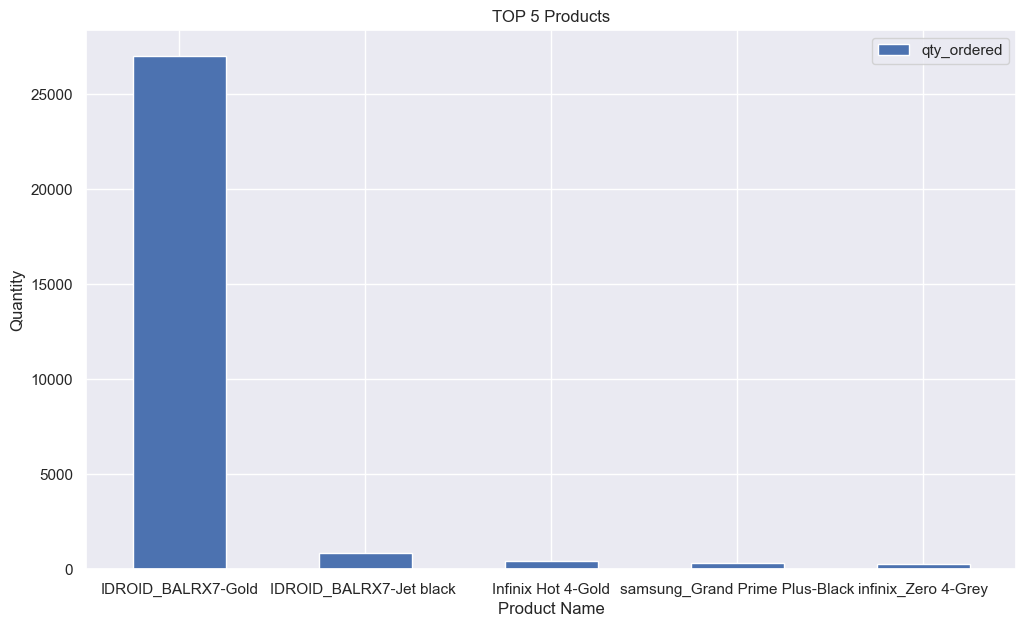

In [23]:
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='bar',
           grid = True,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

In [24]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2021)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

# show
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,3348,3942
1,Beauty & Grooming,4428,4104
2,Books,4617,5265
3,Computing,2943,4077
4,Entertainment,1971,4023
5,Health & Sports,4536,5319
6,Home & Living,5103,6723
7,Kids & Baby,4482,6048
8,Men Fashion,6345,4671
9,Mobiles & Tablets,2889,31131


In [25]:
# add new column named 'qty_growth' 
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021'] * 100),2))

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
  if delta < 0:
    return 'DOWN'
  elif delta == 0:
    return 'FAIR'
  else:
    return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,11394,6858,-4536,-39.81,DOWN
1,Soghaat,20331,16389,-3942,-19.39,DOWN
2,Men Fashion,6345,4671,-1674,-26.38,DOWN
3,Beauty & Grooming,4428,4104,-324,-7.32,DOWN
4,Appliances,3348,3942,594,17.74,UP
5,Books,4617,5265,648,14.04,UP
6,Health & Sports,4536,5319,783,17.26,UP
7,Computing,2943,4077,1134,38.53,UP
8,School & Education,4914,6345,1431,29.12,UP
9,Kids & Baby,4482,6048,1566,34.94,UP


Text(0.5, 0, 'Quantity')

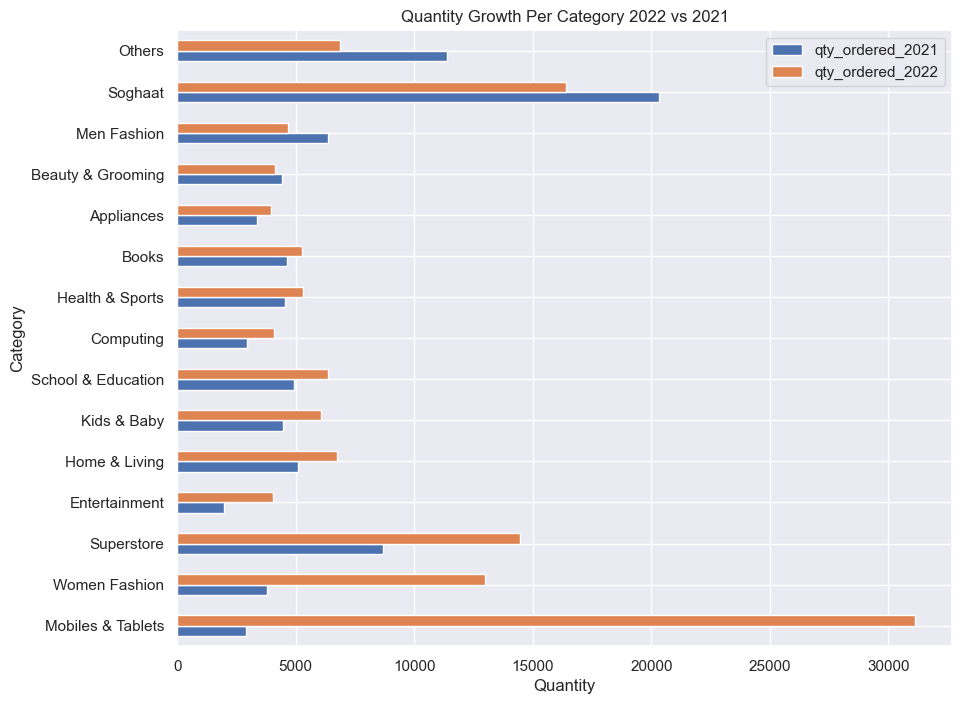

In [26]:
import matplotlib.pyplot as plt
# sort before plot
cat_data_2021_2022.sort_values(by='qty_growth', ascending=False, inplace=True)

# plot to show qty_ordered_2021 and qty_ordered_2022, horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['qty_ordered_2021','qty_ordered_2022'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Quantity Growth Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

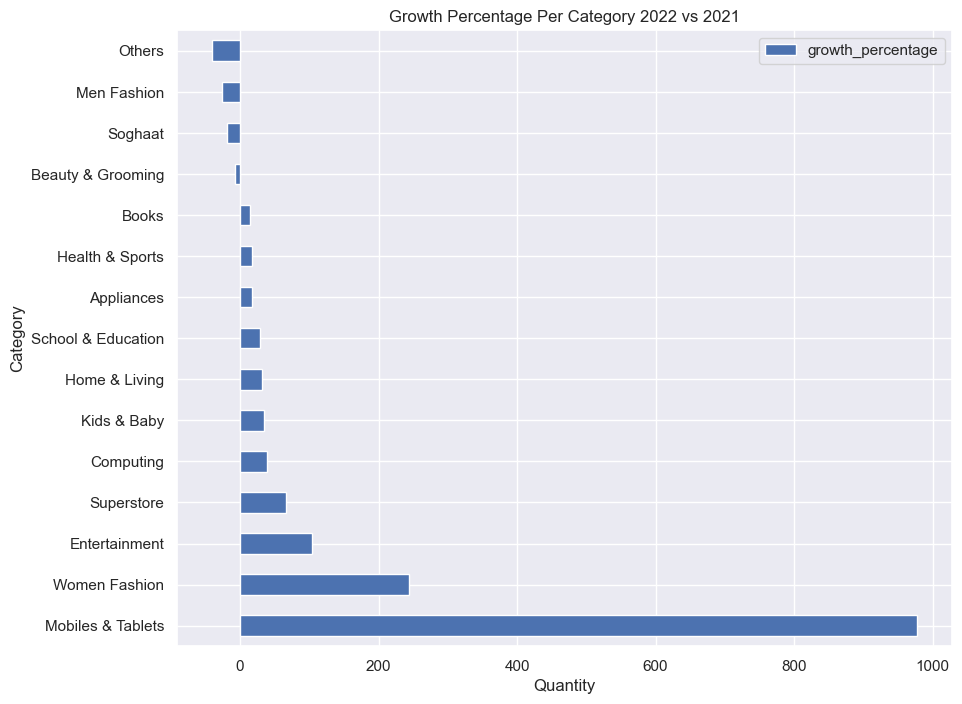

In [27]:
# sort before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['growth_percentage'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Growth Percentage Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [28]:
# Answer 2.2

# Create dataframe with filter category = Others, year of 2022, is_valid = 1
# Aggregate qty_ordered (sum)
others_2022 = pd.DataFrame(\
                           # filter 2022
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2022)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# Create dataframe with filter category = Others, year of 2021, is_valid = 1
# Aggregate qty_ordered (sum)
others_2021 = pd.DataFrame(\
                           # filter 2021
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2021)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# JOIN the dataframes
others_2021_2022 = others_2021.merge(others_2022[['sku_name', 'qty_ordered_2022']], how='outer', on='sku_name')

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,27.0
1,Aladdin_Wrench_Snap N Grip_01,Others,27.0,NaN
2,Aladdin_bike_cover,Others,81.0,54.0
3,Alerashine_sku-09-XL,NaN,NaN,27.0
4,Am-PTV_ATS-004-M,Others,135.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,27.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,27.0
159,test-product-00,NaN,NaN,27.0
160,tucano_IPD7AN-BK,Others,27.0,NaN


In [29]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['category'].fillna('Others', inplace=True)

# fill the rest "NaN" with 0
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\3842611649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  others_2021_2022['category'].fillna('Others', inplace=True)


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,27.0
1,Aladdin_Wrench_Snap N Grip_01,Others,27.0,0.0
2,Aladdin_bike_cover,Others,81.0,54.0
3,Alerashine_sku-09-XL,Others,0.0,27.0
4,Am-PTV_ATS-004-M,Others,135.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,27.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,27.0
159,test-product-00,Others,0.0,27.0
160,tucano_IPD7AN-BK,Others,27.0,0.0


In [30]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021'] = others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add column remark using function "updown_check"
others_2021_2022['remark'] = others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from the smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

# reset the index
others_2021_2022.reset_index(drop=True, inplace=True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,5400.0,1080.0,-4320.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,621.0,0.0,-621.0,DOWN
2,Telemall_MM-DR-HB-L,Others,621.0,54.0,-567.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,540.0,0.0,-540.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,351.0,0.0,-351.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,189.0,189.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,216.0,216.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,351.0,351.0,UP
160,SKMT_Medicine,Others,0.0,540.0,540.0,UP


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\1013559605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)


Text(0.5, 0, 'Delta 2022_2021')

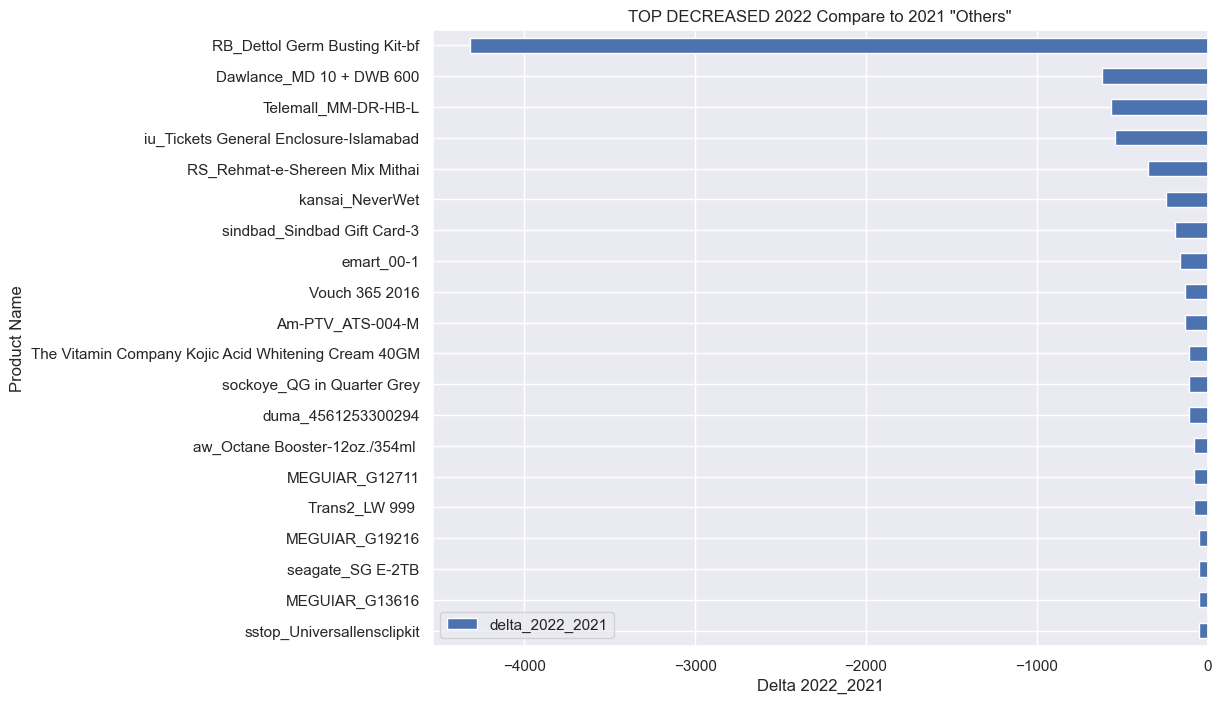

In [31]:
# choose 20 products to show (from the smallest)
others_2021_2022 = others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)

# plot
sns.set()
others_2021_2022.plot(x='sku_name',\
                      y='delta_2022_2021',\
                      kind='barh',\
                      figsize=(10, 8))
plt.title('TOP DECREASED 2022 Compare to 2021 "Others"')
plt.ylabel('Product Name')
plt.xlabel('Delta 2022_2021')

In [32]:
# define dataframe with filter as requested
cs_gross_data = df.loc[:,['customer_id', 'registered_date']][(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]

# show the data
cs_gross_data

,customer_id,registered_date
0,C993531L,2021-11-08
1,C993531L,2021-11-08
2,C993531L,2021-11-08
3,C993531L,2021-11-08
4,C993531L,2021-11-08
...,...,...
155461,C417245L,2022-07-26
155462,C417245L,2022-07-26
155463,C417245L,2022-07-26
155464,C417245L,2022-07-26


In [33]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
  unique_customerid = len(x['customer_id'].unique().tolist())
  rows_count = len(x.index)
  return [unique_customerid,rows_count]

# run validation 
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

Data Before :  [820, 27621]


In [34]:
# run the logic
if test[0] == test[1]:
  print('There is no duplicated data.')
else:
  print('There is duplicated data.')
  # remove the duplicate
  cs_gross_data.drop_duplicates(inplace=True)
  print('Data After : ', check_customerid(cs_gross_data))

# reset the index and show final data
cs_gross_data.reset_index(drop=True, inplace=True)
cs_gross_data

There is duplicated data.
Data After :  [820, 820]


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


In [35]:
# Answer No 4.1

# add column month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

In [36]:
# Create dataframe for weekends data October-December 2022
data_weekends = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekends')\
                             .sort_values(by='month_id', ascending=True)
                             )

# Create dataframe for weekdays data October-December 2022
data_weekdays = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekdays')\
                             .sort_values(by='month_id', ascending=True)
                             )

# merge the dataframe
data_weekdays_weekends = data_weekdays.merge(data_weekends)

# show the data
data_weekdays_weekends

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


<Axes: xlabel='Month Name', ylabel='Average Sales'>

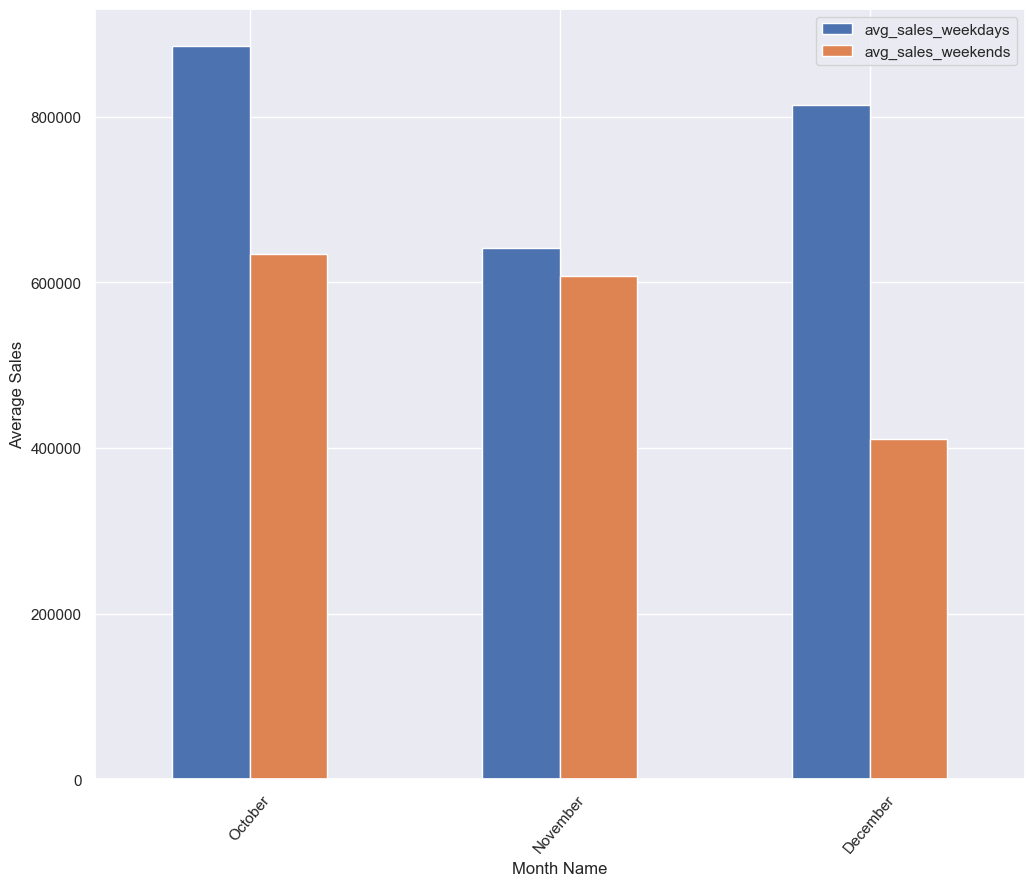

In [37]:
# plot the data
sns.set()
data_weekdays_weekends.plot(x='month_name',
                            y=['avg_sales_weekdays','avg_sales_weekends'],
                            kind='bar',
                            grid = True,
                            xlabel = 'Month Name',
                            ylabel = 'Average Sales',
                            figsize=(12,10),
                            rot = 50,  # for rotate the text in xlabel
                            table = False,
                            secondary_y = False)

In [38]:
# Answer No 4.2

# Filter dataframe df for weekends, October-December 2022
data_weekends_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Filter dataframe df for weekdays, October-December 2022
data_weekdays_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Create dictionary
all_month_avg_compare = {\
                        'Period':'Total 3 months',\
                        'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(),2),\
                        'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(),2),\
                        'Diff (Value)': round(data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(),2),\
                        'Diff (%)': pd.Series(round(((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean())/data_weekends_all['before_discount'].mean())*100,2), dtype=str)+'%'
                        }

# create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare, index=[0])

# show the data
compare_avg_weekends_weekdays

,Period,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 months,772341.0,558865.06,-213475.94,-38.2%


<Axes: xlabel='Period', ylabel='Average Sales'>

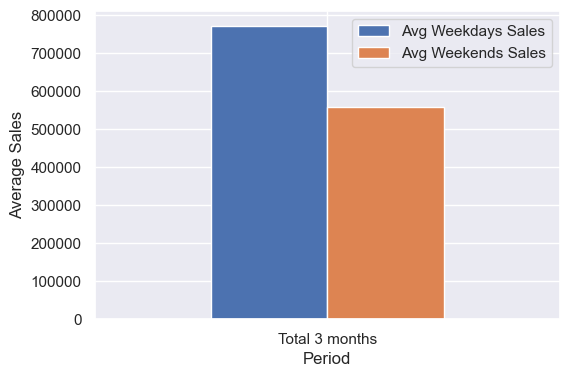

In [39]:
# plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Period',
                                  y=['Avg Weekdays Sales','Avg Weekends Sales'],
                                  kind='bar',
                                  grid = True,
                                  # xlabel = 'Month Name',
                                  ylabel = 'Average Sales',
                                  figsize=(6,4),
                                  rot = 0,  # for rotate the text in xlabel
                                  table = False,
                                  secondary_y = False)

In [40]:
# Specify the file path and name
file_path = r"C:\Users\Pragya Gupta\Desktop\google looker project\finalproject.csv"  # Update with your desired folder path

# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:\Users\Pragya Gupta\Desktop\google looker project\finalproject.csv


In [41]:
db_config={
    "host":"localhost",
    "user":"root",
    "password":"pragya",
    "database":"sales2"}

In [42]:
order_detail_path = r'C:\Users\Pragya Gupta\Desktop\google looker project\dataset\order_detail.csv'
customer_detail_path = r'C:\Users\Pragya Gupta\Desktop\google looker project\dataset\customer_detail.csv'
sku_detail_path = r'C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sku_detail.csv'
payment_detail_path = r'C:\Users\Pragya Gupta\Desktop\google looker project\dataset\payment_detail.csv'

In [43]:
#TASK1
#Analyzing Sales Decrease in the "Others" Category Between 2021 and 2022 Scenario: The Warehouse Team has observed a surplus in the stock of "Others" category products at the end of 2022. They would like to know if sales have declined in 2022 compared to 2021. Additionally, they want to see the 20 products that experienced the largest decrease in sales. Requirements: 1. Create two datasets: o One for sales data in 2021 (qty_ordered for "Others" category). o One for sales data in 2022 (qty_ordered for "Others" category). 2. Merge the datasets and calculate the sales difference between 2022 and 2021. 3. Calculate the percentage change in sales and classify it as "DOWN", "UP", or "FAIR". 4. Sort the products by the largest decrease in sales and show the top 20 products. 5. Create a horizontal bar chart to display the products with the largest decrease in sales between 2022 and 2021. Key Features to Use: • category • order_date (for filtering by year) • is_valid • sku_name • qty_ordered

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

finalproject = pd.read_csv(r'C:\Users\Pragya Gupta\Desktop\google looker project\finalproject.csv')

finalproject['order_date'] = pd.to_datetime(finalproject['order_date'])
finalproject['year'] = finalproject['order_date'].dt.year 
print(finalproject.head())

               id customer_id order_date   sku_id  price  qty_ordered  \
0  ODR1111336599a    C993531L 2022-02-23  P569750  62002            1   
1  ODR1111336599a    C993531L 2022-02-23  P569750  62002            1   
2  ODR1111336599a    C993531L 2022-02-23  P569750  62002            1   
3  ODR1111336599a    C993531L 2022-02-23  P569750  62002            1   
4  ODR1111336599a    C993531L 2022-02-23  P569750  62002            1   

   before_discount  discount_amount  after_discount  is_gross  ...  \
0          62002.0              0.0         62002.0         1  ...   
1          62002.0              0.0         62002.0         1  ...   
2          62002.0              0.0         62002.0         1  ...   
3          62002.0              0.0         62002.0         1  ...   
4          62002.0              0.0         62002.0         1  ...   

                      sku_name  base_price     cogs       category  \
0  emart_Magic Hose Pipe 75 Ft     61654.0  51156.0  Home & Living   


In [45]:
# 1. Filter and group data
df_2021 = finalproject[(finalproject['year'] == 2021) & (finalproject['category'] == 'Others') & (finalproject['is_valid'] == True)].groupby('sku_name')['qty_ordered'].sum().reset_index()
df_2022 = finalproject[(finalproject['year'] == 2022) & (finalproject['category'] == 'Others') & (finalproject['is_valid'] == True )].groupby('sku_name')['qty_ordered'].sum().reset_index()

In [46]:
# 2. Merge datasets
merged_df = pd.merge(df_2021, df_2022, on='sku_name', suffixes=('_2021', '_2022'))

In [47]:
# 3. Calculate sales difference and percentage change
merged_df['sales_diff'] = merged_df['qty_ordered_2022'] - merged_df['qty_ordered_2021']
merged_df['percentage_change'] = (merged_df['sales_diff'] / merged_df['qty_ordered_2021']) * 100

# Classify change
def classify_change(percentage):
    if percentage < 0:
        return 'DOWN'
    elif percentage > 0:
        return 'UP'
    else:
        return 'FAIR'

merged_df['change_category'] = merged_df['percentage_change'].apply(classify_change)

In [48]:
# 4. Sort and display top 20
top_20_decrease = merged_df.sort_values(by='sales_diff', ascending=True).head(20)

print("Top 20 Products with Largest Sales Decrease:")
print(top_20_decrease[['sku_name', 'sales_diff', 'percentage_change', 'change_category']])

Top 20 Products with Largest Sales Decrease:
                                             sku_name  sales_diff  \
7                       RB_Dettol Germ Busting Kit-bf       -4320   
8                                 Telemall_MM-DR-HB-L        -567   
16                                    kansai_NeverWet        -243   
14                                         emart_00-1        -162   
5                                      MEGUIAR_G12711         -81   
0                                  Aladdin_bike_cover         -27   
11            aw_Ultra Shine Wash & Wax-64oz./1893ml          -27   
9                                     Tmall_MM-DR-PAD         -27   
2   Entertainer Asia_Vouch 365-2017 Mobile App Lahore         -27   
4                                       MEGUIAR_A1214           0   
3                                       Lacie_9000146           0   
12                                 electro_Humidifier           0   
10                         aw_CONSTRUCTION FOAM-700ml     

C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\3603068095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_diff', y='sku_name', data=top_20_decrease, palette='viridis')


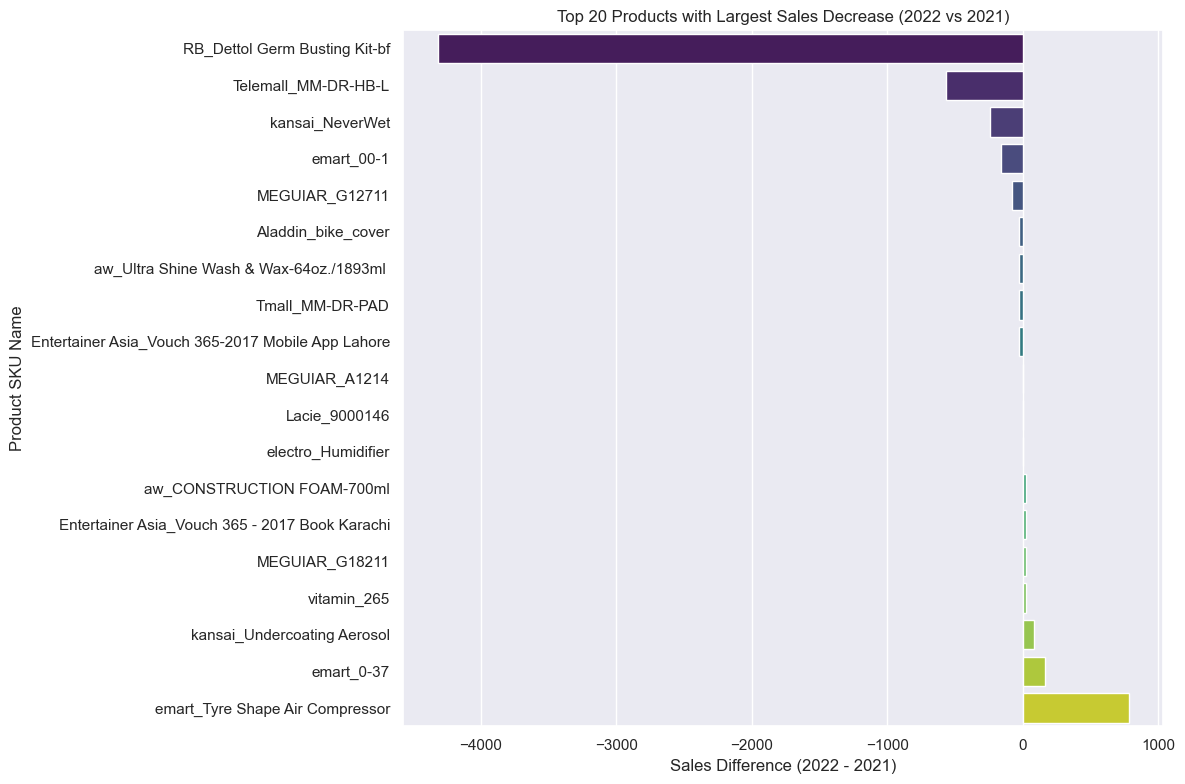

In [49]:
# 5. Create horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='sales_diff', y='sku_name', data=top_20_decrease, palette='viridis')
plt.title('Top 20 Products with Largest Sales Decrease (2022 vs 2021)')
plt.xlabel('Sales Difference (2022 - 2021)')
plt.ylabel('Product SKU Name')
plt.tight_layout()
plt.show()

In [50]:
 sql_queries = [
     """
    -- 1. Create datasets for 2021 and 2022
    CREATE TABLE sales_2021 AS
    SELECT
        sd.sku_name,
        SUM(od.qty_ordered) AS sales_2021
    FROM order_detail od
    JOIN sku_detail sd ON od.sku_id = sd.id
    WHERE YEAR(od.order_date) = 2021
    AND sd.category = 'Others'
    AND od.is_valid = 1
    GROUP BY sd.sku_name;
    select* from sales_2021;
    """,
    """
    CREATE TABLE sales_2022 AS
    SELECT
        sd.sku_name,
        SUM(od.qty_ordered) AS sales_2022
    FROM order_detail od
    JOIN sku_detail sd ON od.sku_id = sd.id
    WHERE YEAR(od.order_date) = 2022
    AND sd.category = 'Others'
    AND od.is_valid = 1
    GROUP BY sd.sku_name;
    select* from sales_2022;
    """,
    """- 2. Merge datasets and calculate sales difference
     CREATE TABLE merged_sales AS
    SELECT
        COALESCE(s21.sku_name, s22.sku_name) AS sku_name,
        COALESCE(s21.sales_2021, 0) AS sales_2021,
        COALESCE(s22.sales_2022, 0) AS sales_2022,
        COALESCE(s22.sales_2022, 0) - COALESCE(s21.sales_2021, 0) AS sales_difference
    FROM sales_2021 s21
    LEFT JOIN sales_2022 s22 ON s21.sku_name = s22.sku_name
    UNION
    SELECT
        COALESCE(s21.sku_name, s22.sku_name) AS sku_name,
        COALESCE(s21.sales_2021, 0) AS sales_2021,
        COALESCE(s22.sales_2022, 0) AS sales_2022,
        COALESCE(s22.sales_2022, 0) - COALESCE(s21.sales_2021, 0) AS sales_difference
    FROM sales_2021 s21
    RIGHT JOIN sales_2022 s22 ON s21.sku_name = s22.sku_name
    WHERE s21.sku_name IS NULL;
    select* from merged_sales;
    """,
    """
    -- 3. Calculate percentage change and classify
    CREATE TABLE sales_analysis AS
    SELECT
        sku_name,
        sales_2021,
        sales_2022,
        sales_difference,
        CASE
            WHEN sales_2021 = 0 THEN 0 -- Avoid division by zero
            ELSE (sales_difference * 100.0 / sales_2021)
        END AS percentage_change,
        CASE
            WHEN (sales_difference * 100.0 / sales_2021) < -10 THEN 'DOWN'
            WHEN (sales_difference * 100.0 / sales_2021) > 10 THEN 'UP'
            ELSE 'FAIR'
        END AS change_classification
    FROM merged_sales;
    select * from sales_analysis;
    """,
    """
    -- 4. Sort by largest decrease and show top 20
    SELECT
        sku_name,
        sales_2021,
        sales_2022,
        sales_difference,
        percentage_change,
        change_classification
    FROM sales_analysis
    ORDER BY sales_difference ASC
    LIMIT 20;
    """
]
       



In [51]:
from IPython.display import display
# Connect to the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    # Execute each query and display results
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  # Display the DataFrame in the notebook
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\2866178178.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\2866178178.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,year,category,total_transaction
0,2022,Mobiles & Tablets,9.128256e+08
1,2022,Entertainment,3.611392e+08
2,2022,Appliances,3.095840e+08
3,2022,Computing,2.124082e+08
4,2022,Men Fashion,1.333326e+08
5,2022,Women Fashion,9.023613e+07
6,2022,Home & Living,7.865896e+07
7,2022,Health & Sports,5.200838e+07
8,2022,Beauty & Grooming,4.559842e+07
9,2022,Superstore,3.264327e+07



--- question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\2866178178.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,remark
0,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,INCREASE
1,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,INCREASE
2,Computing,1.728789e+08,2.124082e+08,3.952934e+07,INCREASE
3,School & Education,1.138840e+07,1.730505e+07,5.916641e+06,INCREASE
4,Women Fashion,8.404596e+07,9.023613e+07,6.190171e+06,INCREASE
5,Superstore,2.861523e+07,3.264327e+07,4.028039e+06,INCREASE
6,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,INCREASE
7,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,INCREASE
8,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,INCREASE
9,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,INCREASE



--- question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\2866178178.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



--- question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data. ---


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\2866178178.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed.


In [52]:
import os

In [53]:
db_config = { 
    "host": "localhost",
    "user" : "root",
    "password" : "pragya",
    "database" : "sales2"
}

In [54]:
output_folder = r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset"
os.makedirs(output_folder, exist_ok=True)

In [55]:
tables = ["sales_2021", "sales_2022", "merged_sales","sales_analysis"]

In [56]:
from sqlalchemy import create_engine

engine = create_engine(f"mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}?charset=utf8mb4")

for table in tables:
    # ... (your f-string formatting fixes) ...

    df = pd.read_sql(f"SELECT * FROM {table}", engine)

    # ... (rest of your export code) ...
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # Read table data into a DataFrame
        df = pd.read_sql(f"SELECT * FROM {table}", connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: sales_2021
Table sales_2021 exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sales_2021.csv.
Exporting table: sales_2022
Table sales_2022 exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sales_2022.csv.
Exporting table: merged_sales
Table merged_sales exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\merged_sales.csv.
Exporting table: sales_analysis
Table sales_analysis exported successfully to C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sales_analysis.csv.
Database connection closed.


C:\Users\Pragya Gupta\AppData\Local\Temp\ipykernel_24688\397151847.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", connection)


In [57]:
df_sales_2021 = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sales_2021.csv")
df_sales_2022 = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sales_2022.csv")
df_merged_sales = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\merged_sales.csv")
df_sales_analysis = pd.read_csv(r"C:\Users\Pragya Gupta\Desktop\google looker project\dataset\sales_analysis.csv")

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

finalproject = pd.read_csv(r'C:\Users\Pragya Gupta\Desktop\google looker project\finalproject.csv')

In [59]:
# 1. Calculate total net profit per customer
finalproject['net_profit'] = finalproject['after_discount'] - finalproject['cogs']
customer_net_profit = finalproject.groupby('customer_id')['net_profit'].sum().reset_index()

In [60]:
# 2. Categorize customers based on net profit
def categorize_customer(net_profit):
    if net_profit < 100:
        return 'Low'
    elif 100 <= net_profit <= 500:
        return 'Medium'
    else:
        return 'High'

customer_net_profit['customer_segment'] = customer_net_profit['net_profit'].apply(categorize_customer)


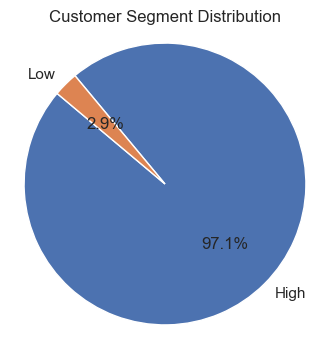

     customer_id  net_profit customer_segment
0       C107850L  30713850.0             High
1       C110122L   1954368.0             High
2       C111666L  32698080.0             High
3       C111795L   2198664.0             High
4       C111808L   3168018.0             High
...          ...         ...              ...
3993    C998685L    657720.0             High
3994    C998826L   3139830.0             High
3995    C998847L   1725732.0             High
3996    C999472L   4925070.0             High
3997    C999498L  61860240.0             High

[3998 rows x 3 columns]


In [61]:
# 3. Create a pie chart
segment_counts = customer_net_profit['customer_segment'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(customer_net_profit)

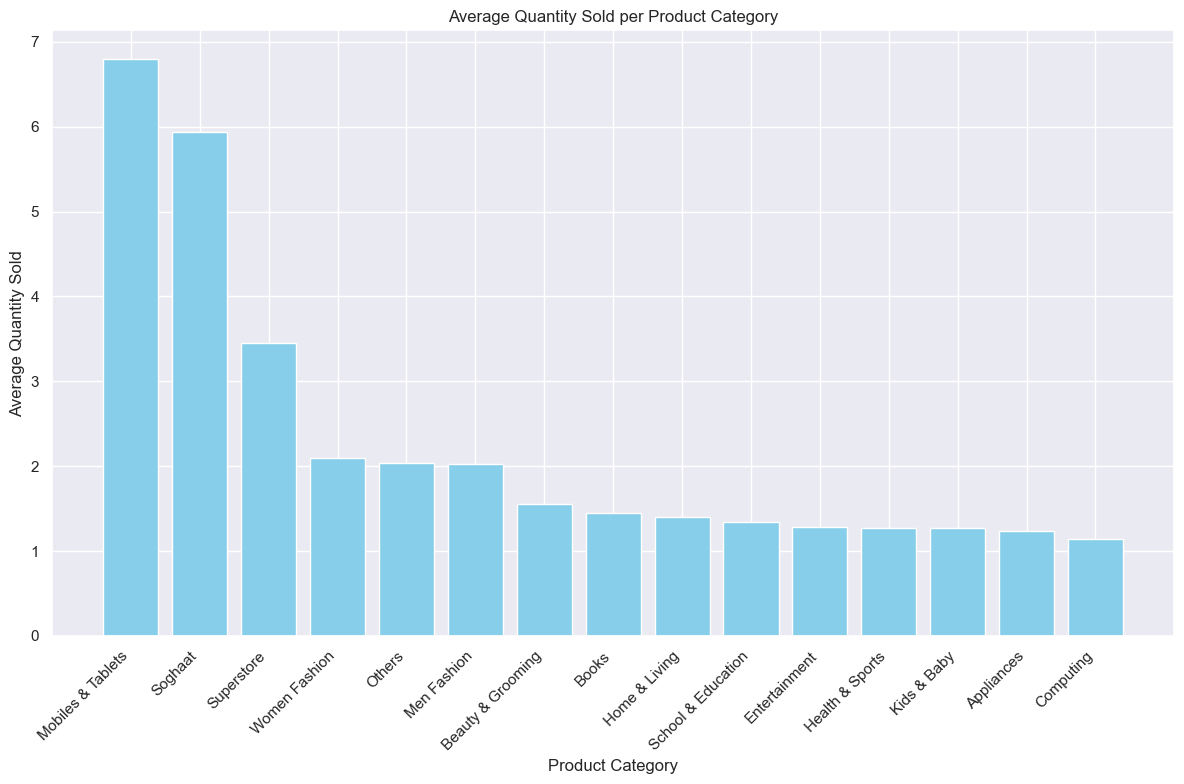

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'finalproject.csv'
df = pd.read_csv(r'C:\Users\Pragya Gupta\Desktop\google looker project\finalproject.csv')

required_columns = ['category', 'qty_ordered']
if not all(col in df.columns for col in required_columns):
    raise ValueError("Missing required columns: 'category', 'qty_ordered'")

avg_qty_by_category = df.groupby('category')['qty_ordered'].mean().reset_index()

avg_qty_by_category = avg_qty_by_category.sort_values(by='qty_ordered', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(avg_qty_by_category['category'], avg_qty_by_category['qty_ordered'], color='skyblue')

plt.title('Average Quantity Sold per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [65]:
sorted_categories = finalproject.groupby('category')['qty_ordered'].mean().sort_values(ascending=False)

# Display the sorted result
print(sorted_categories)

category
Mobiles & Tablets     6.794045
Soghaat               5.937500
Superstore            3.452055
Women Fashion         2.102244
Others                2.040302
Men Fashion           2.030227
Beauty & Grooming     1.555831
Books                 1.444056
Home & Living         1.403509
School & Education    1.342939
Entertainment         1.278820
Health & Sports       1.270471
Kids & Baby           1.267857
Appliances            1.231343
Computing             1.146465
Name: qty_ordered, dtype: float64
